In [4]:
import json
import os
paperdirectory = "/Users/fernandodurier/Desktop/sarcasm-paper-review"
data=[]
import random

def graphPapers(papers):
    ##
    # clean-authors 
    # clean-refs 
    # title 
    # path.split('\/')[len(path.split('\/'))]
    vertrixes=[] #set of works
    edges=[] #set of tuples, (source, target) 
    jedges=[] #set of edges for jgraph lib
    jvertrixes={} #set of edges for jgraph lib
    for p in papers:
        ptitle=p['title']
        if ptitle:
            ptitle=ptitle.replace('\n', ' ')
            ptitle=ptitle.strip().lstrip().rstrip()

        vertrixes.append(ptitle)

        for r in p['clean-refs']:
            rtitle=r['title']
            if rtitle:
                rtitle=rtitle.replace('\n', ' ')
                rtitle=rtitle.strip().lstrip().rstrip()

            if rtitle not in vertrixes:
                vertrixes.append(rtitle)
            
            ptuple=(vertrixes.index(ptitle), vertrixes.index(rtitle))
            jgraphdict={"source":vertrixes.index(ptitle), "target":vertrixes.index(rtitle)}
            if vertrixes.index(ptitle) not in jvertrixes:
                jvertrixes[vertrixes.index(ptitle)] = {'color': "%06x" % random.randint(0, 0xFFFFFF), 'size': 3.0}
            if vertrixes.index(rtitle) not in jvertrixes:
                jvertrixes[vertrixes.index(rtitle)] = {'color': "%06x" % random.randint(0, 0xFFFFFF), 'size': 1.50}
            if jgraphdict not in jedges:
                jedges.append(jgraphdict)
            if ptuple not in edges:
                edges.append(ptuple)
    
#     print("Vertrixes: ",vertrixes)
#     print("Edges: ", edges)
#     print("N_Vertrixes: ", len(vertrixes))
#     print("N_Edges: ", len(edges))
#     print("Jvertrixes:", jvertrixes)
#     print("Jedges:", jedges)
    return {"edges_array":edges, "vertrix_array":vertrixes,"nodes":jvertrixes,"edges":jedges}

for root, dirs, files in os.walk(paperdirectory, topdown=False):
   for name in files:
        if "-deep.json" in name:
            with open(paperdirectory+"/"+name) as f:
                d = json.load(f)
                data.append(d)



In [5]:
gf = graphPapers(data)

In [6]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install jgraph networkx

You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
import jgraph
jgraph.draw(gf)

In [14]:
import networkx as nx

G=nx.Graph()
G.add_nodes_from(gf['nodes'])

G.add_edges_from(gf['edges_array'])

# print("Nodes of graph: ")
# print(G.nodes())
# print("Edges of graph: ")
# print(G.edges())

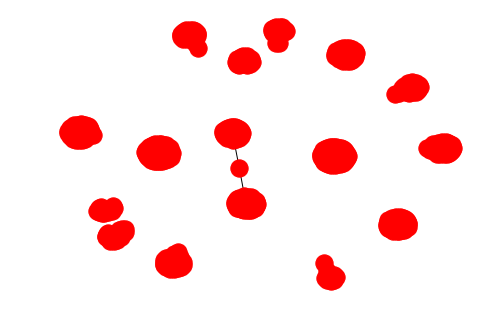

In [13]:
nx.draw(G)